In [1]:
#Loading data & importing lib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel(r'D:\Datasets\World Eco. Indicators\WorldBank.xlsx')

In [ ]:
# Data Inspection
df.head() #to get first 5 values of data
df.describe() # to describe the data
df.info() #to view datatypes of columns and info
df.isnull().sum() #it aggregaes the missing values sum by columns. it shows how many null values are there
df.duplicated().sum() #to get the sum of all the duplicates found

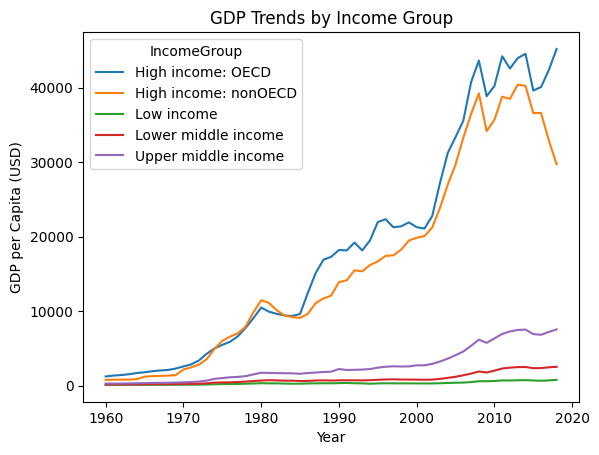

In [ ]:
#GDP and internet usage trends by income group

# Group by income group and year, calculate averages
grouped_income = df.groupby(['IncomeGroup', 'Year'])[['GDP per capita (USD)', 'Individuals using the Internet (% of population)']].mean().reset_index()

# GDP trends by income group
sns.lineplot(data=grouped_income, x='Year', y='GDP per capita (USD)', hue='IncomeGroup')
plt.title('GDP Trends by Income Group')
plt.ylabel('GDP per Capita (USD)')
plt.show()


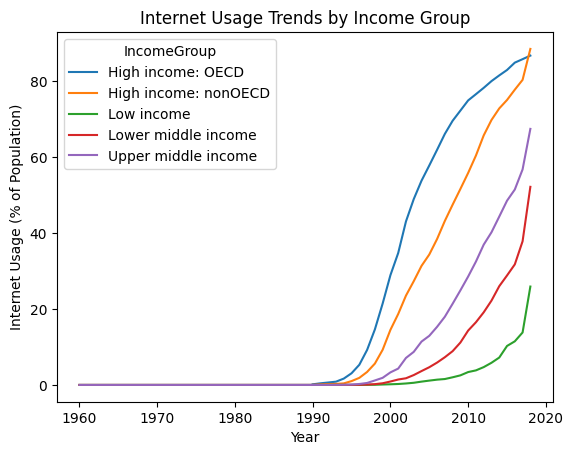

In [ ]:
# Internet usage trends by income group
sns.lineplot(data=grouped_income, x='Year', y='Individuals using the Internet (% of population)', hue='IncomeGroup')
plt.title('Internet Usage Trends by Income Group')
plt.ylabel('Internet Usage (% of Population)')
plt.show()

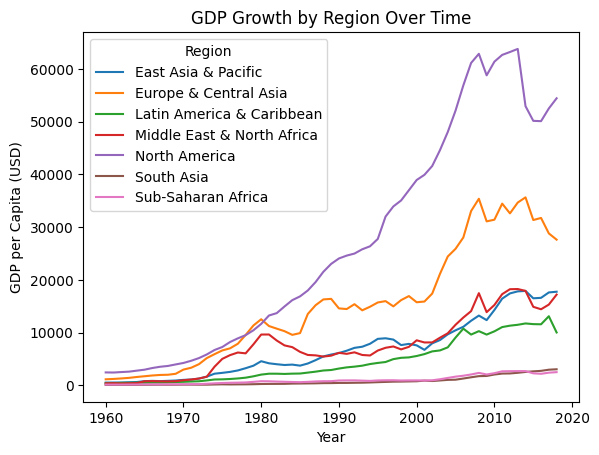

In [18]:
#GDP Growth by Region

# Group by Region and Year, calculate averages
grouped_region = df.groupby(['Region', 'Year'])[['GDP per capita (USD)']].mean().reset_index()

sns.lineplot(data=grouped_region, x='Year', y='GDP per capita (USD)', hue='Region')
plt.title('GDP Growth by Region Over Time')
plt.ylabel('GDP per Capita (USD)')
plt.show()


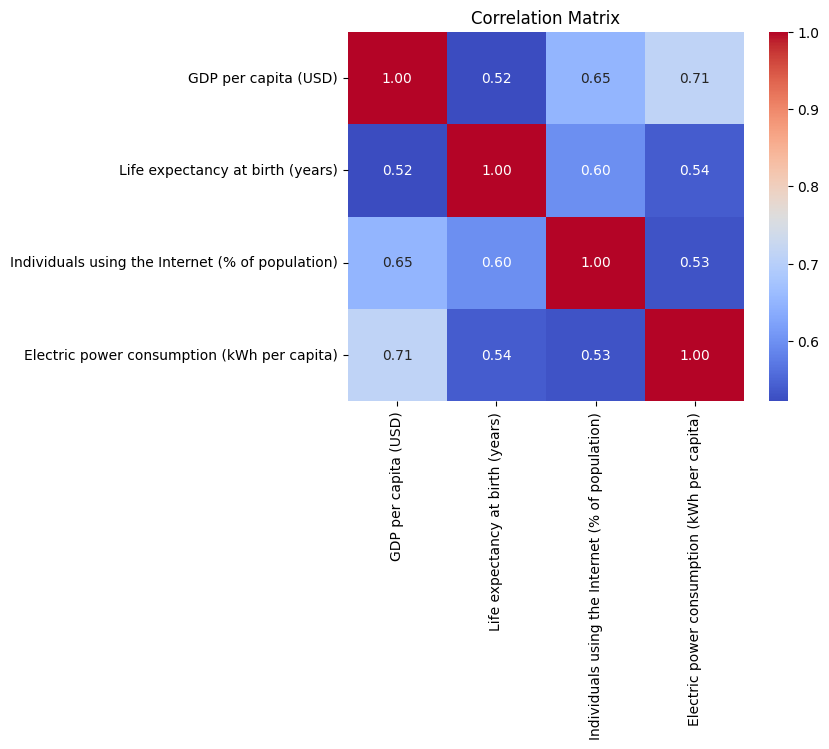

In [19]:
#Correlation Analysis

# Correlation analysis for key numerical columns
correlation_matrix = df[[
    'GDP per capita (USD)', 
    'Life expectancy at birth (years)', 
    'Individuals using the Internet (% of population)', 
    'Electric power consumption (kWh per capita)'
]].corr()

# Plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [20]:
#Top Countries by Internet Usage in 2018

# Filter data for the year 2018 and sort by Internet Usage
top_countries_internet = df[df['Year'] == 2018].sort_values(by='Individuals using the Internet (% of population)', ascending=False).head(5)

print("Top 5 Countries by Internet Usage in 2018:")
print(top_countries_internet[['Country Name', 'Individuals using the Internet (% of population)']])


Top 5 Countries by Internet Usage in 2018:
               Country Name  Individuals using the Internet (% of population)
9027                  Qatar                                           99.6528
6018                 Kuwait                                           99.6000
5074                Iceland                                           99.0110
826                 Bahrain                                           98.6434
11682  United Arab Emirates                                           98.4500


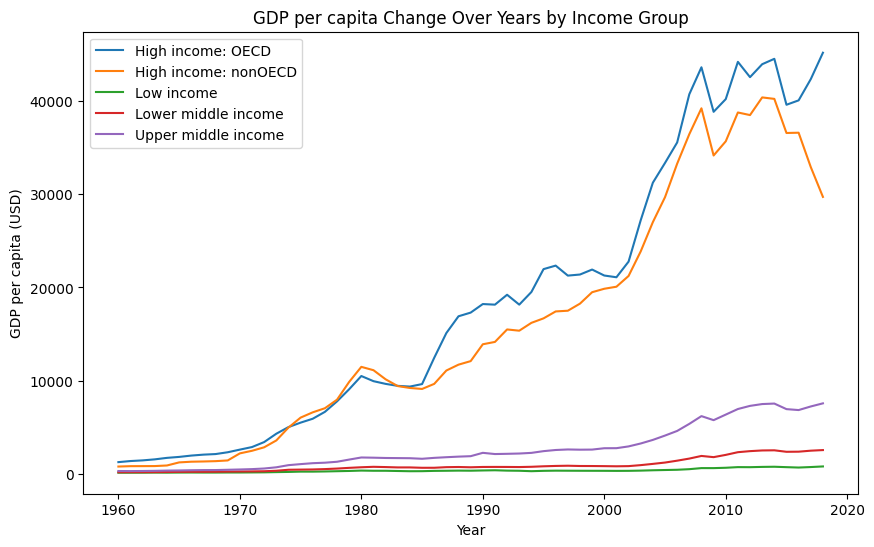

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # making Year in datetime format
gdp_per_capita_by_group = df.groupby(['IncomeGroup', 'Year'])['GDP per capita (USD)'].mean().reset_index()

plt.figure(figsize=(10, 6))
for group in gdp_per_capita_by_group['IncomeGroup'].unique():
    group_data = gdp_per_capita_by_group[gdp_per_capita_by_group['IncomeGroup'] == group]
    plt.plot(group_data['Year'], group_data['GDP per capita (USD)'], label=group)

plt.xlabel('Year')
plt.ylabel('GDP per capita (USD)')
plt.title('GDP per capita Change Over Years by Income Group')
plt.legend()
plt.show()


In [31]:
correlation = df[['Life expectancy at birth (years)', 'GDP per capita (USD)']].corr().iloc[0, 1]
print(f"Correlation between life expectancy and GDP per capita: {correlation}")


Correlation between life expectancy and GDP per capita: 0.5219750920066188


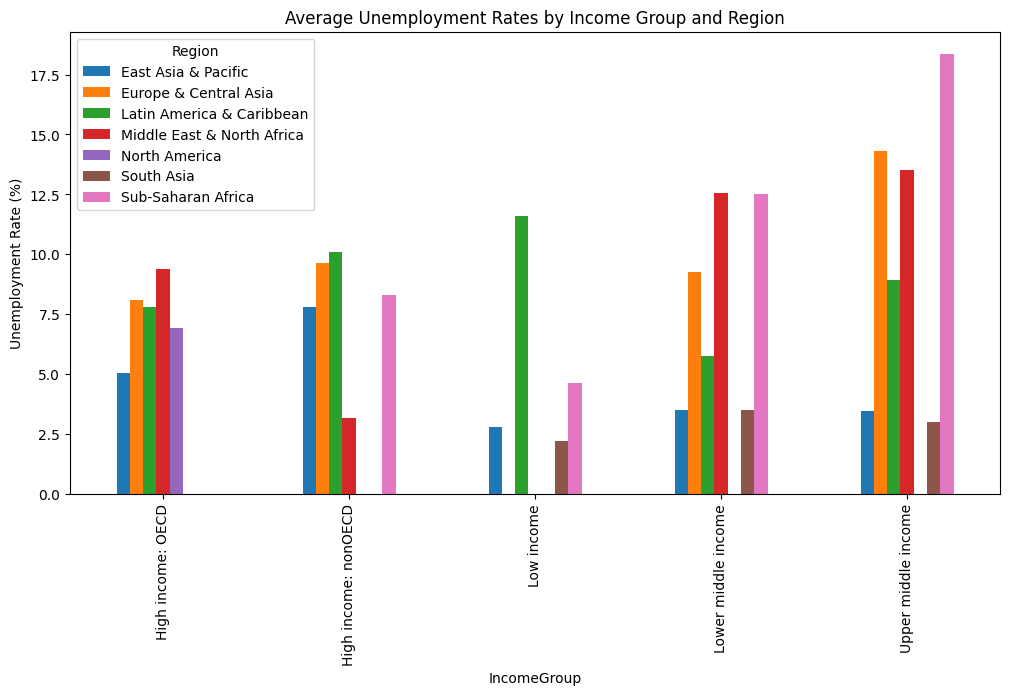

In [32]:
#average unemployment rates by income group and region

unemployment_by_group_region = df.groupby(['IncomeGroup', 'Region'])['Unemployment (% of total labor force) (modeled ILO estimate)'].mean().unstack()
unemployment_by_group_region.plot(kind='bar', figsize=(12, 6))
plt.title('Average Unemployment Rates by Income Group and Region')
plt.ylabel('Unemployment Rate (%)')
plt.show()


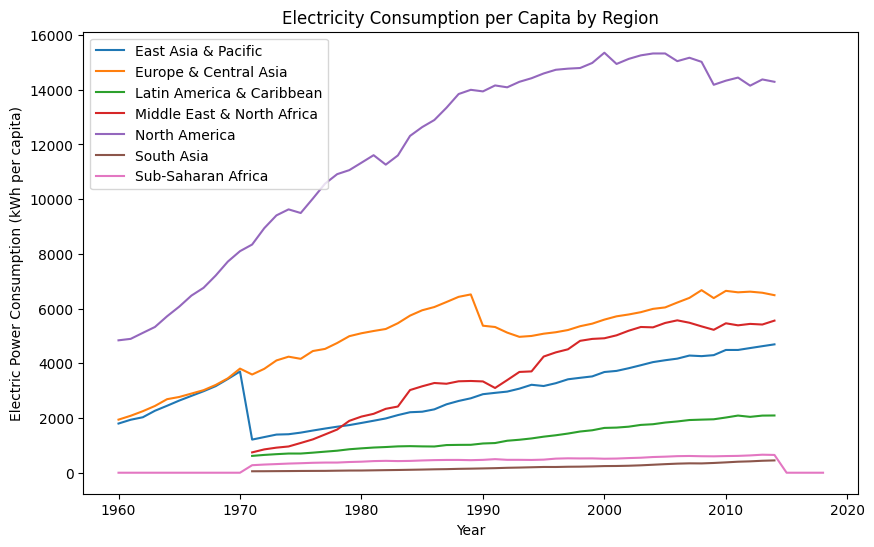

In [36]:
#electricity consumption per capita evolved over the years in different regions

electricity_by_region = df.groupby(['Region', 'Year'])['Electric power consumption (kWh per capita)'].mean().reset_index()

plt.figure(figsize=(10, 6))
for region in electricity_by_region['Region'].unique():
    region_data = electricity_by_region[electricity_by_region['Region'] == region]
    plt.plot(region_data['Year'], region_data['Electric power consumption (kWh per capita)'], label=region)

plt.xlabel('Year')
plt.ylabel('Electric Power Consumption (kWh per capita)')
plt.title('Electricity Consumption per Capita by Region')
plt.legend()
plt.show()


In [37]:
# countries which have the highest HDI in the latest year available
latest_year = df['Year'].max()
highest_hdi = df[df['Year'] == latest_year].nlargest(5, 'GDP per capita (USD)')  # Assuming HDI correlates with GDP for simplification
highest_hdi[['Country Name', 'GDP per capita (USD)']]


,Country Name,GDP per capita (USD)
6549,Luxembourg,114340.0
6608,"Macao SAR, China",86355.4
10738,Switzerland,82838.9
8319,Norway,81807.2
5369,Ireland,78806.4


In [ ]:

# Filter low income countries
low_income_countries = df[df['IncomeGroup'] == 'Low income']

# Ensure 'Life expectancy at birth (years)' is numeric
low_income_countries['Life expectancy at birth (years)'] = pd.to_numeric(
    low_income_countries['Life expectancy at birth (years)'], errors='coerce'
)

# Group by 'Country Name' and calculate the mean life expectancy
avg_life_expectancy = (
    low_income_countries.groupby('Country Name')['Life expectancy at birth (years)']
    .mean()  # Automatically skips NaN values
    .reset_index()
)

# Sort by life expectancy in descending order and select the top 10
top_countries = avg_life_expectancy.sort_values(by='Life expectancy at birth (years)', ascending=False).head(10)

# Display the result
print(top_countries)

   Country Name  Life expectancy at birth (years)
22  North Korea                         64.972862
30     Zimbabwe                         54.298810
7       Comoros                         54.036138
20        Nepal                         53.346914
14        Haiti                         53.135293
16   Madagascar                         52.707121
28         Togo                         52.345724
27     Tanzania                         51.240103
9       Eritrea                         50.877983
1         Benin                         50.703759


C:\Users\Laptop Solutions\AppData\Local\Temp\ipykernel_8588\1829929628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_income_countries['Life expectancy at birth (years)'] = pd.to_numeric(


C:\Users\Laptop Solutions\AppData\Local\Temp\ipykernel_8588\4267429410.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_income_countries['Life expectancy at birth (years)'] = pd.to_numeric(
C:\Users\Laptop Solutions\AppData\Local\Temp\ipykernel_8588\4267429410.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


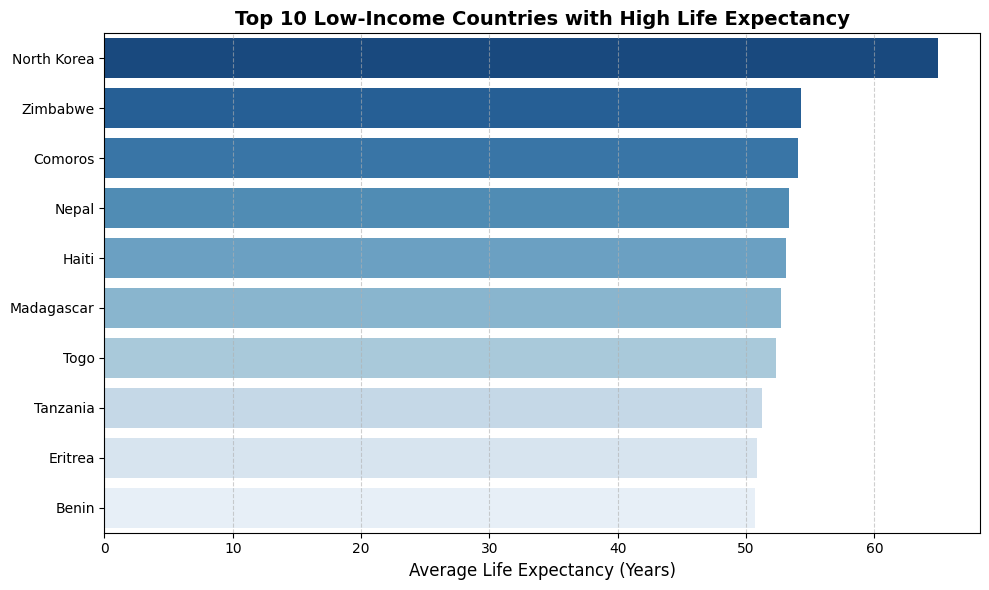

In [22]:

# Filter low-income countries
low_income_countries = df[df['IncomeGroup'] == 'Low income']

# Ensure 'Life expectancy at birth (years)' is numeric
low_income_countries['Life expectancy at birth (years)'] = pd.to_numeric(
    low_income_countries['Life expectancy at birth (years)'], errors='coerce'
)

# Group by 'Country Name' and calculate the mean life expectancy
avg_life_expectancy = (
    low_income_countries.groupby('Country Name')['Life expectancy at birth (years)']
    .mean()
    .reset_index()
)

# Sort by life expectancy in descending order and select the top 10
top_countries = avg_life_expectancy.sort_values(by='Life expectancy at birth (years)', ascending=False).head(10)

# Plot the chart
plt.figure(figsize=(10, 6))
# Reverse the color palette so that dark blue is for high life expectancy
colors = sns.color_palette("Blues_r", len(top_countries))

sns.barplot(
    x='Life expectancy at birth (years)',
    y='Country Name',
    data=top_countries,
    palette=colors
)

# Customize the chart
plt.title('Top 10 Low-Income Countries with High Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Average Life Expectancy (Years)', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()
